In [1]:
# Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Machine learning modules
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")
train.head()

Train shape: (42000, 785)
Test shape: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Split features and target
X = train.drop('label', axis=1)
y = train['label']

# Normalize pixel values
X = X / 255.0


In [11]:
# Split training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=4
)

In [13]:
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}")

Training set: (33600, 784), Validation set: (8400, 784)


In [15]:
# Initialize model
log_reg = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial',
    max_iter=1000,
    n_jobs=-1  # use all available CPU cores
)

print("Training logistic regression model...")
log_reg.fit(X_train, y_train)
print("✅ Model training complete.")

Training logistic regression model...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Model training complete.


In [17]:
# Predict on validation set
y_pred = log_reg.predict(X_val)

# Metrics
acc = accuracy_score(y_val, y_pred)
print(f"Validation Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_val, y_pred))

Validation Accuracy: 0.9160

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       834
           1       0.94      0.97      0.96       907
           2       0.90      0.90      0.90       843
           3       0.89      0.88      0.88       851
           4       0.94      0.93      0.93       761
           5       0.88      0.86      0.87       753
           6       0.94      0.95      0.94       858
           7       0.93      0.92      0.93       898
           8       0.89      0.89      0.89       803
           9       0.90      0.89      0.89       892

    accuracy                           0.92      8400
   macro avg       0.92      0.91      0.92      8400
weighted avg       0.92      0.92      0.92      8400



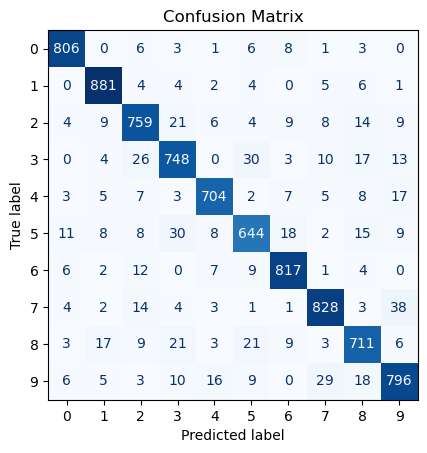

In [19]:
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d', colorbar=False)
plt.title("Confusion Matrix")
plt.show()


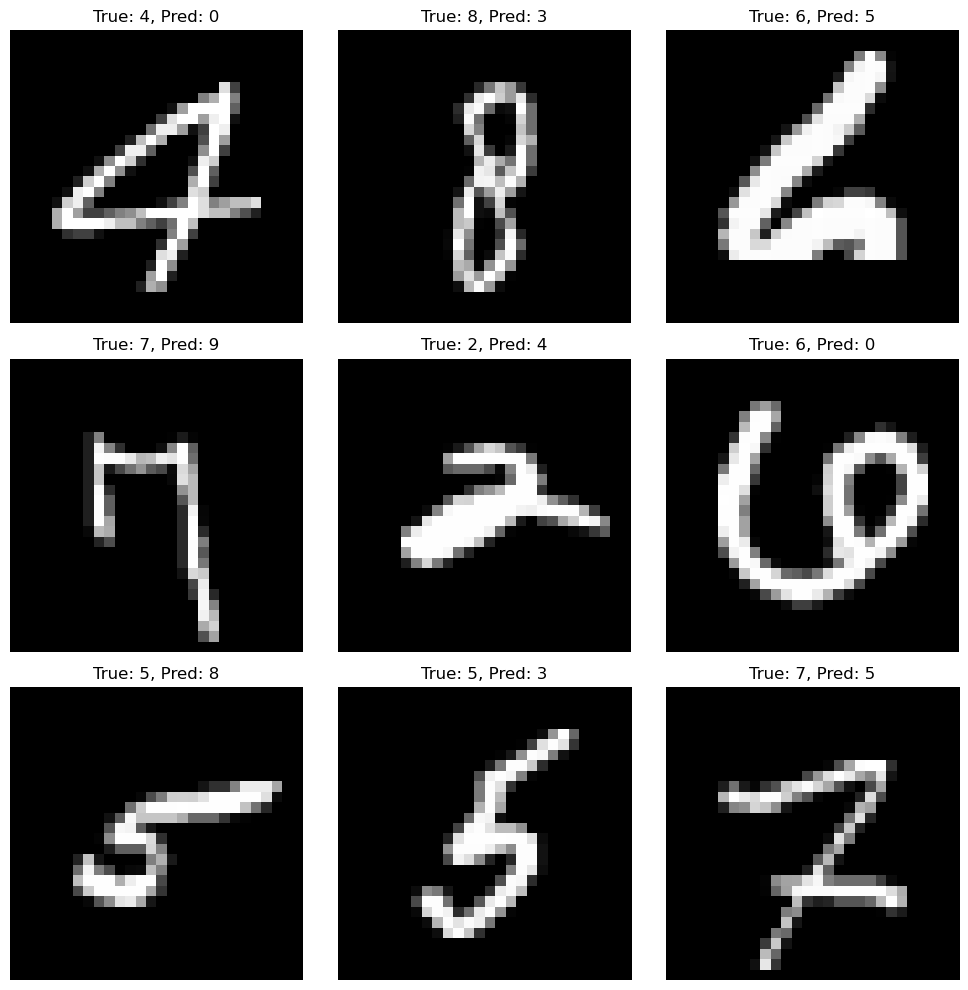

In [21]:
# Get misclassified indices
misclassified_idx = np.where(y_val != y_pred)[0]

# Show a few
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_idx[:9]):
    image = np.array(X_val.iloc[idx]).reshape(28, 28)
    plt.subplot(3, 3, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_val.iloc[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [23]:
# Normalize test data
test = test / 255.0

# Predict
predictions = log_reg.predict(test)

# Create submission CSV
submission = pd.DataFrame({
    'ImageId': range(1, len(predictions) + 1),
    'Label': predictions
})

submission.to_csv('submission.csv', index=False)
print("✅ Submission file saved as 'submission.csv'")


✅ Submission file saved as 'submission.csv'


In [25]:
# made and submitted this file of the test data
# the result was Score: 0.91825 on Kaggle

In [29]:
!jupyter nbconvert --to script Logistic_Regression_testing.ipynb

[NbConvertApp] Converting notebook Logistic_Regression_testing.ipynb to script
[NbConvertApp] Writing 2630 bytes to Logistic_Regression_testing.py
